In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import random

import sys
from Bio import Entrez

from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, pearsonr

In [2]:
driver_map_data_all_df = pd.read_csv('DriverMapTPM.tsv',delimiter='\t')
driver_map_data_all_df = driver_map_data_all_df.set_index('target')
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

#df['Val_Diff'] = df['Val10'] - df['Val1']

# subtract values of negative control from all samples
# not the most pyrhonic way, meh...
driver_map_data_all_df['A2'] = (driver_map_data_all_df['A2']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A3'] = (driver_map_data_all_df['A3']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A4'] = (driver_map_data_all_df['A4']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A5'] = (driver_map_data_all_df['A5']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A6'] = (driver_map_data_all_df['A6']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A7'] = (driver_map_data_all_df['A7']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A8'] = (driver_map_data_all_df['A8']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A9'] = (driver_map_data_all_df['A9']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A10'] = (driver_map_data_all_df['A10']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A12'] = (driver_map_data_all_df['A11']-driver_map_data_all_df['A12'])

driver_map_data_all_df['B2'] = (driver_map_data_all_df['B2']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B3'] = (driver_map_data_all_df['B3']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B4'] = (driver_map_data_all_df['B4']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B5'] = (driver_map_data_all_df['B5']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B6'] = (driver_map_data_all_df['B6']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B7'] = (driver_map_data_all_df['B7']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B8'] = (driver_map_data_all_df['B8']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B9'] = (driver_map_data_all_df['B9']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B10'] = (driver_map_data_all_df['B10']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B12'] = (driver_map_data_all_df['B11']-driver_map_data_all_df['B12'])


driver_map_data_all_df.head()

,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
target,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,23.53280,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,20.49390,0.546198,48.08530,74.59220,26.27370,1.19616,45.71820,2.83643,122.24700
13331|PEX14,19.08750,14.08670,14.08670,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,17.62190,33.521000,26.23420,24.65790,36.15540,15.84860,18.20870,14.82460,34.43790
6630|RAD52,3.66106,4.29017,4.29017,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,2.68903,3.567860,7.23578,2.48444,3.01742,-0.13778,4.39435,-1.32502,4.68598
16802|CLYBL,-23.00000,12.58540,-21.88960,-17.580300,-20.19320,-29.54648,-4.10800,-5.53250,-18.95460,-27.22456,...,9.44277,-29.45763,-27.730400,-26.60330,-34.02516,-14.43210,-17.51350,-26.89270,-35.08378,-21.97320
6645|RANBP1,71.64050,79.22280,79.22280,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,58.72263,28.094730,97.97153,85.66803,39.27063,17.34733,40.00133,34.52083,110.84353


In [3]:
# create data frame for driver map original samples 
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

#switch_driver_map_data_log_df


C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
target,,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601,4.556601
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262,3.816262
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035,2.101035
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844,6.307844
12149|KDF1,1.228763,1.961342,3.665779,2.496324,1.895225,2.114320,0.000000,0.000000,2.031924,0.452079,0.452079


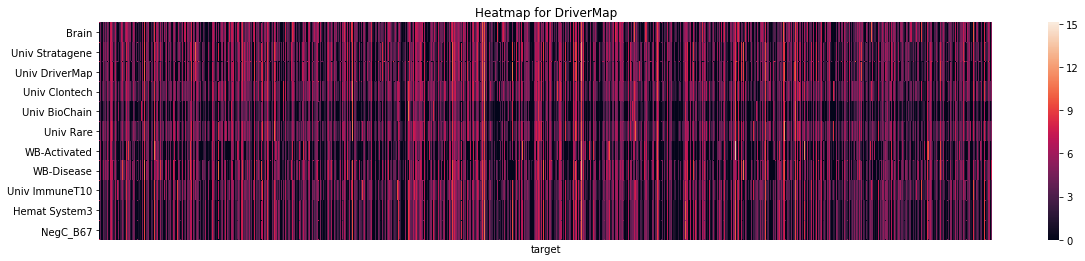

In [4]:
# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# drop NaN values
driver_map_data_log_df.dropna(inplace=True)

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_original_dropped.csv')
driver_map_data_log_df.head()

In [5]:
# operations performed to conferm that all target genes are unique values
gene_list = driver_map_data_df.index.tolist() # number of genes 18989
unique_genes = list(driver_map_data_df.index.unique())
unique_genes_split = driver_map_data_df.index.str.split('|')

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989
len(gene_name_list)

18989

In [6]:
# Make DF for DriverMap original samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']
#driver_map_data_df.reset_index()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# drop NaN values
driver_map_data_log_df.dropna(inplace=True)

min_value_list = list(driver_map_data_df.min())
max_value_list = list(driver_map_data_df.max())
mean_value_list = list(driver_map_data_df.mean())
std_value_list = list(driver_map_data_df.std())
mean_value_list = list(driver_map_data_df.mean())
median_value_list = list(driver_map_data_df.median())
q1_value_list = list(driver_map_data_df.quantile(.25))
q3_value_list = list(driver_map_data_df.quantile(.75))

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_original_dropped.csv')

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.


C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log2
  
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log2


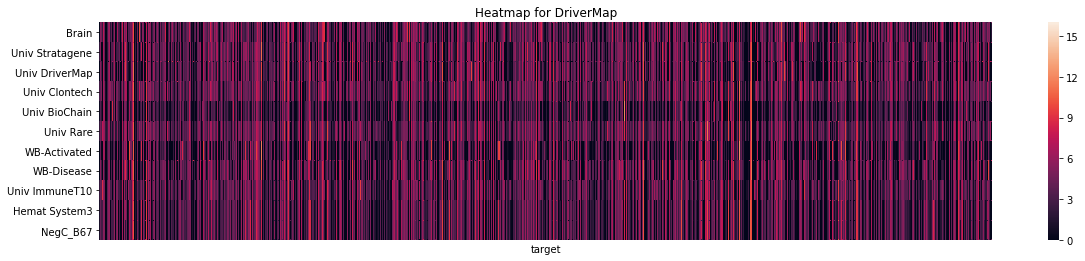

In [7]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_bsa_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_bsa_df.columns.to_list()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = np.log2(driver_map_data_bsa_df)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
# drop NaN values
driver_map_data_bsa_log_df.dropna(inplace=True)
    
#flip axis
switch_driver_map_data_bsa_log_df=driver_map_data_bsa_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_bsa_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_bsa_log_df.to_csv('DM_data_log_BSA_dropped.csv')

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = np.log2(driver_map_data_bsa_df)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
driver_map_data_bsa_log_df.dropna(inplace=True)

described_data_bsa_log_df = pd.DataFrame(driver_map_data_bsa_log_df.describe())
flipped_described_data_bsa_log_df = described_data_bsa_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_bsa_log_df

flipped_described_data_bsa_log_df.to_csv('DM_describe_data_log_BSA_dropped.csv')

In [8]:
described_data_bsa_log_df


,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
count,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000
mean,3.511489,3.576630,3.457214,3.858608,2.665834,3.738115,2.735038,3.350695,3.581114,3.335518,3.302563
std,2.604847,2.647682,2.709080,2.398937,2.404766,2.383483,2.696072,2.792519,2.436256,2.540143,2.517189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.053099,1.034722,0.585822,2.060277,0.000000,1.924892,0.000000,0.000000,1.637676,1.023644,1.011354
50%,3.640407,3.726504,3.529240,3.944980,2.460983,3.849859,2.346272,3.419174,3.615199,3.322067,3.297499
75%,5.447629,5.565971,5.506932,5.586784,4.371254,5.447439,4.716250,5.521948,5.301224,5.130034,5.089168
max,16.015493,12.968098,12.960174,14.101352,14.015801,12.682703,14.581995,13.203096,15.196160,13.240241,13.199231


In [9]:
driver_map_data_bsa_log_df.dropna(inplace=True)
driver_map_data_bsa_log_df.head()
len(driver_map_data_bsa_log_df['Brain'])

10492

In [10]:
driver_map_data_log_df.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
target,,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601,4.556601
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262,3.816262
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035,2.101035
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844,6.307844
12149|KDF1,1.228763,1.961342,3.665779,2.496324,1.895225,2.114320,0.000000,0.000000,2.031924,0.452079,0.452079


In [11]:
#obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
#obs.shape
#chisquare(obs)
#(array([ 2.        ,  6.66666667]), array([ 0.84914504,  0.24663415]))
a_1 = list(driver_map_data_log_df['Brain'])
#a_2 = list(driver_map_data_bsa_log_df['Brain'])
a_2 = list(driver_map_data_log_df['NegC_B67'])

brain_comparison = np.array([[a_1], [a_2]]).T

chisquare(brain_comparison)

#b_1 = list(driver_map_data_log_df['Univ Stratagene'])
#b_2 = list(driver_map_data_bsa_log_df['Univ Stratagene'])

#stratagene_comparison = np.array([[b_1], [b_2]]).T
#chisquare(stratagene_comparison)

Power_divergenceResult(statistic=array([[22319.51188974, 23512.4899939 ]]), pvalue=array([[0., 0.]]))

In [12]:
#from scipy import stats
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
#driver_map_data_all_df[['A2', 'B2']].plot(kind='box'), 
#driver_map_data_all_df[['A3', 'B3']].plot(kind='box'), 
#driver_map_data_all_df[['A4', 'B4']].plot(kind='box'), 
#driver_map_data_all_df[['A5', 'B5']].plot(kind='box'), 
#driver_map_data_all_df[['A6', 'B6']].plot(kind='box')

In [21]:
#fig, ax = plt.subplots()
#driver_map_data_all_df[['A7', 'B7']].plot(kind='box'), 
#driver_map_data_all_df[['A8', 'B8']].plot(kind='box'), 
#driver_map_data_all_df[['A9', 'B9']].plot(kind='box'), 
#driver_map_data_all_df[['A10', 'B10']].plot(kind='box'), 
#driver_map_data_all_df[['A11', 'B11']].plot(kind='box')

In [14]:
bins = [-1,0,4,7,17]
bin_labels = ['no read','low','medium','high']

def bin_logs(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
    for j in list(bin_dataf.columns):
        gr_count = bin_dataf.groupby(j)[j].count()
        bin_group[j] = gr_count
    
    return pd.DataFrame.from_dict(bin_group)

In [15]:
binned_dm_data = bin_logs(driver_map_data_log_df)
binned_dm_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
no read,2242,2340,2706,1199,3183,1360,3899,3261,1688,2379,2387
low,4043,4130,3949,4852,5015,4848,3850,3454,5086,4920,4935
medium,4043,3908,3689,4383,2720,4313,2851,3600,3783,3311,3329
high,1091,1041,1075,985,501,898,819,1104,862,809,768


In [16]:
binned_bsa_data = bin_logs(driver_map_data_bsa_log_df)
binned_bsa_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
no read,2022,1992,2344,1058,2727,1172,3436,2759,1383,1906,1912
low,3737,3621,3470,4285,4646,4356,3610,3164,4499,4322,4374
medium,3743,3820,3602,4151,2642,4088,2682,3447,3742,3421,3413
high,990,1059,1076,998,477,876,764,1122,868,843,793


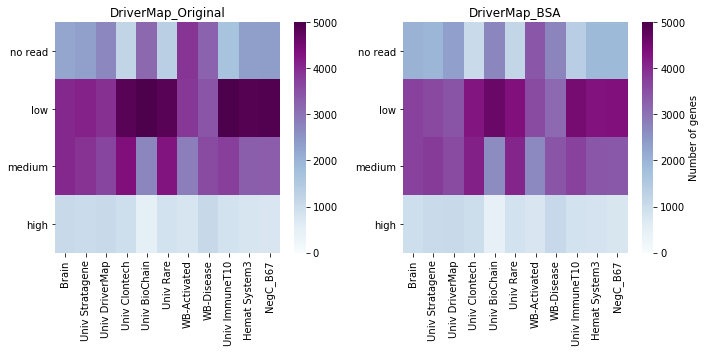

In [17]:
fig = plt.figure(figsize = (10,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(binned_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=5000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original')

sns.heatmap(binned_bsa_data, cmap = 'BuPu', ax = ax2, vmin=0, vmax=5000, cbar_kws = {'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation = 0)
ax2.set_title('DriverMap_BSA')

plt.tight_layout()

In [18]:
np.mean(binned_bsa_data.describe().std())

1406.383092507274

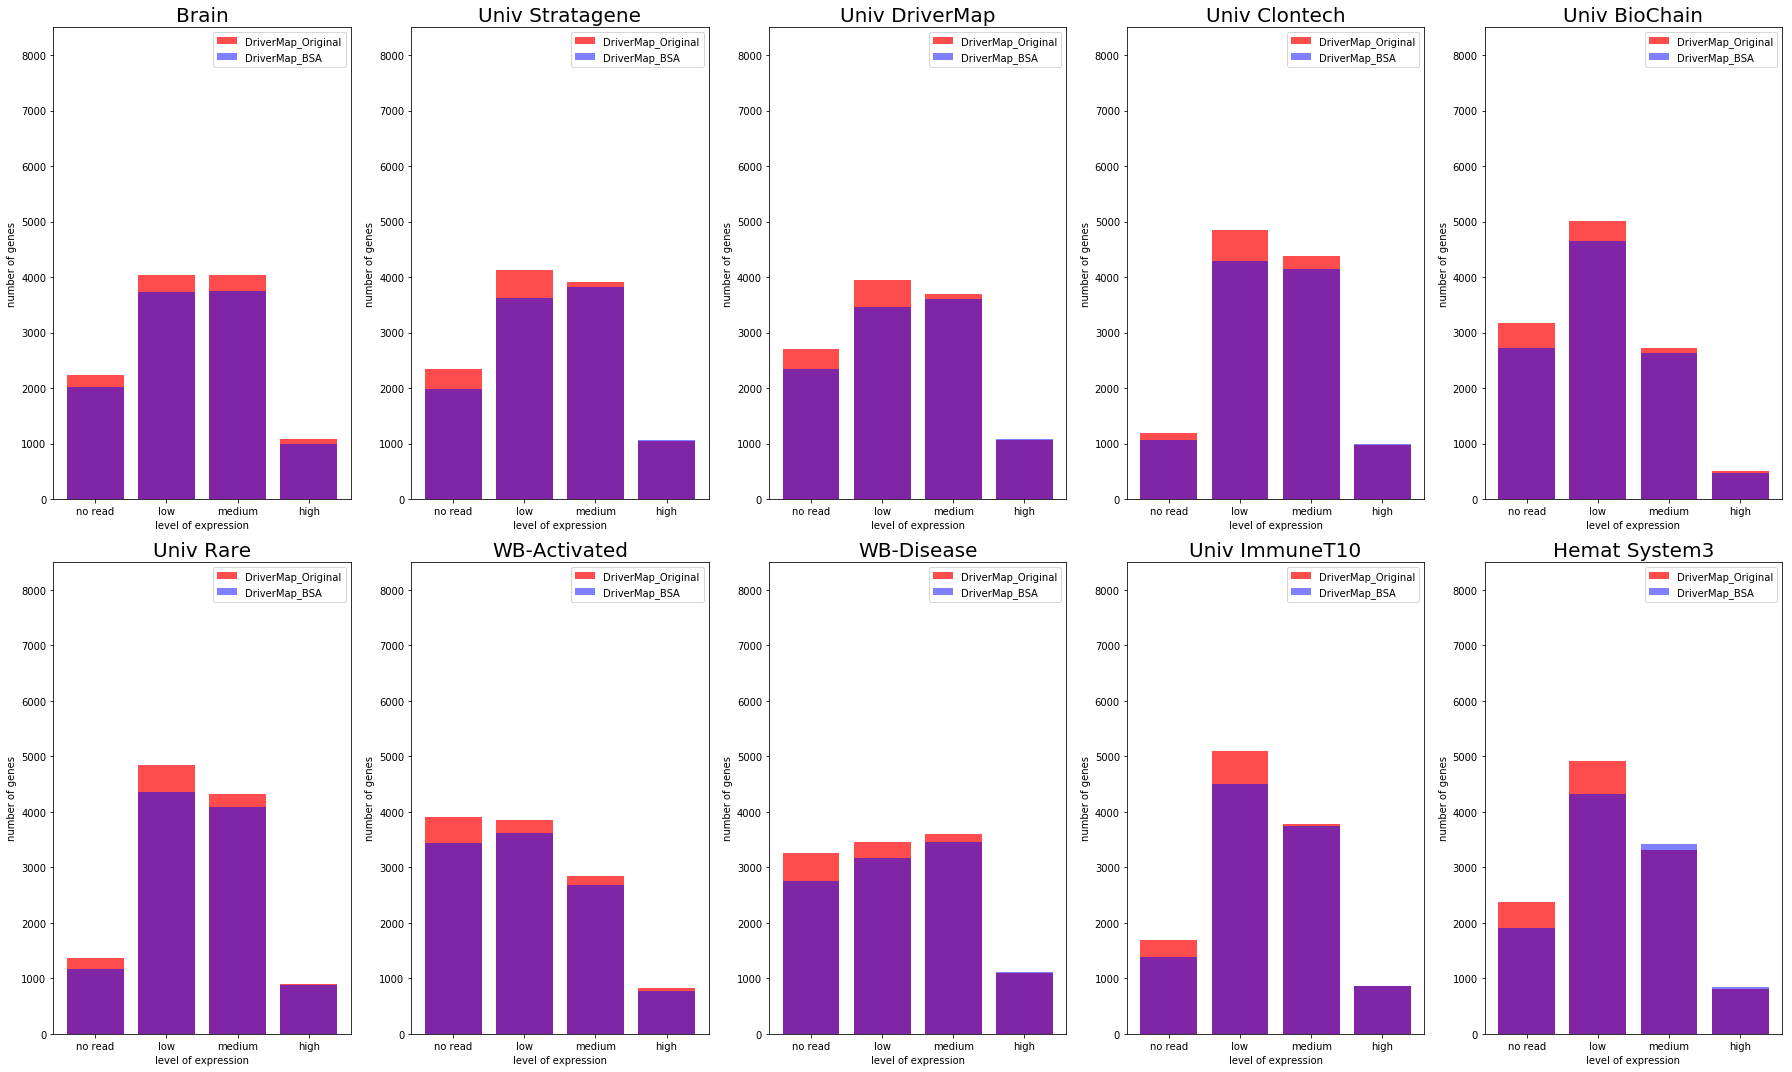

In [19]:
plt.figure(figsize=(25,15))

for i in range(10):
    title_font = {'size':'20'}
    plt.subplot(2,5,i+1)
    plt.bar(x = binned_dm_data.index, height = binned_dm_data.iloc[:,i], alpha=0.7, color='red',label='DriverMap_Original')
    plt.bar(x = binned_bsa_data.index, height = binned_bsa_data.iloc[:,i], alpha=0.5, color='blue',label='DriverMap_BSA')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.ylim(0, 8500)
    plt.legend()
    
plt.tight_layout()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

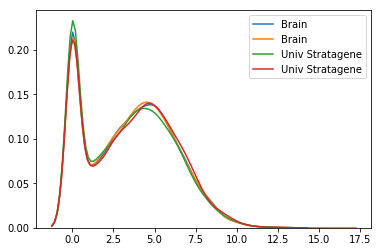

In [22]:
for i in range(10):
    title_font = {'size':'20'}
    fig, ax = plt.subplots()
    sns.kdeplot(driver_map_data_log_df['Brain'], ax=ax)
    sns.kdeplot(driver_map_data_bsa_log_df['Brain'], ax=ax)
    sns.kdeplot(driver_map_data_log_df['Univ Stratagene'], ax=ax)
    sns.kdeplot(driver_map_data_bsa_log_df['Univ Stratagene'], ax=ax)
    
    ax = sns.kdeplot(driver_map_data_log_df['Brain'], driver_map_data_bsa_log_df['Brain'])


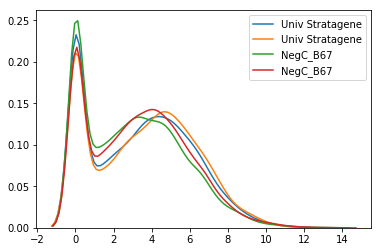

In [23]:
fig1, ax = plt.subplots()
sns.kdeplot(driver_map_data_log_df['Univ Stratagene'], ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df['Univ Stratagene'], ax=ax)
sns.kdeplot(driver_map_data_log_df['NegC_B67'], ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df['NegC_B67'], ax=ax)

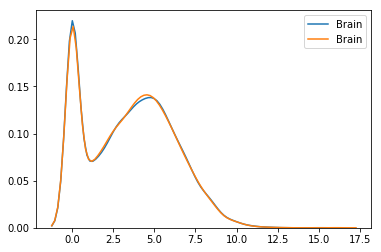

In [24]:
ax = sns.kdeplot(driver_map_data_log_df['Brain'])
ax = sns.kdeplot(driver_map_data_bsa_log_df['Brain'])

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


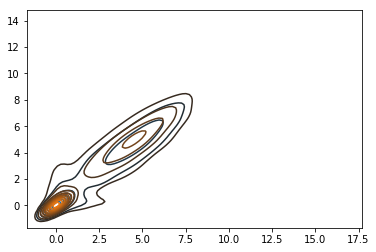

In [25]:
fig, ax = plt.subplots()
sns.kdeplot(driver_map_data_log_df, ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df, ax=ax)

In [ ]:
f, axes = plt.subplots(3, 4, figsize=(15, 7), sharex=True)
['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

ax = sns.distplot( driver_map_data_log_df['Brain'] , color="red", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Brain'] , color="blue", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Stratagene'] , color="red", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Stratagene'] , color="blue", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_log_df['Univ DriverMap'] , color="red", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ DriverMap'] , color="blue", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_log_df['Univ Clontech'] , color="red", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Clontech'] , color="blue", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_log_df['Univ BioChain'] , color="red", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ BioChain'] , color="blue", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Rare'] , color="red", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Rare'] , color="blue", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_log_df['WB-Activated'] , color="red", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Activated'] , color="blue", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_log_df['WB-Disease'] , color="red", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Disease'] , color="blue", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_log_df['Univ ImmuneT10'] , color="red", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ ImmuneT10'] , color="blue", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_log_df['Hemat System3'] , color="red", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Hemat System3'] , color="blue", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_log_df['NegC_B67'] , color="red", ax=axes[2, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['NegC_B67'] , color="blue", ax=axes[2, 3])


C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


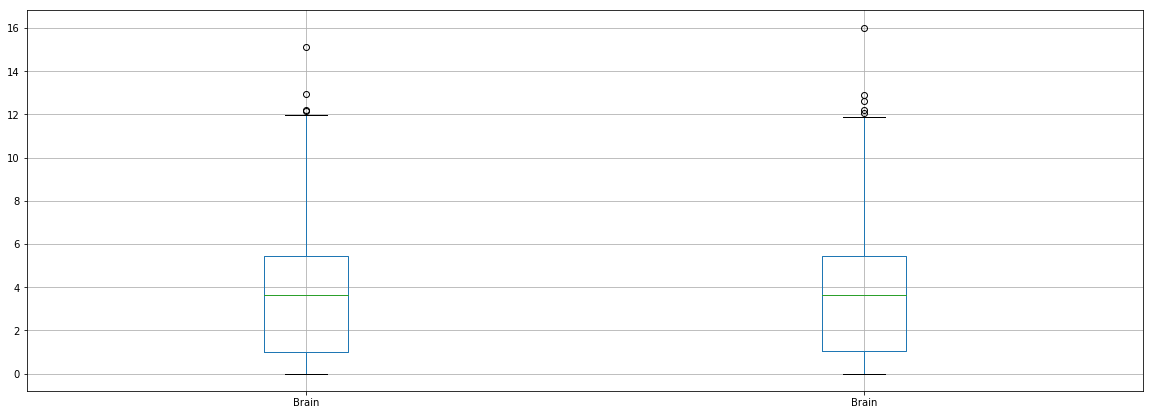

In [36]:
tempb = driver_map_data_log_df['Brain']
tempc = driver_map_data_bsa_log_df['Brain']
tempd = pd.concat((tempb, tempc), axis=1)
plt.figure(figsize=(20,7))
tempd.boxplot()

In [40]:
# t-test for binned data
idx = binned_dm_data.index.intersection(binned_bsa_data.index)
t_test_bins_df = pd.DataFrame(ttest_ind(binned_dm_data.loc[idx], binned_bsa_data.loc[idx], axis=1), 
                              index=['t-stat','p-value'], columns = bin_labels)

#Ttest_indResult(
#    statistic=array([-0.31240597,  0.66835531, -0.17359046, -0.21035294]), 
#    pvalue=array([0.75796591, 0.51154742, 0.86393227, 0.83552046]))
flip_t_test_bins_df = t_test_bins_df.transpose()

flip_t_test_bins_df.describe()
t_test_bins_df
# no real statistical difference

,no read,low,medium,high
t-stat,1.084349,1.973420,0.485887,0.101695
p-value,0.291109,0.062426,0.632328,0.920012


In [42]:
#t-test for log data
index = ['Original', 'BSA']

idx = driver_map_data_log_df.index.intersection(driver_map_data_bsa_log_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_log_df.loc[idx], driver_map_data_bsa_log_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'])
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 871 genes have statistical significance after values were dropped
#flip_t_test_df.describe()

871

In [47]:
pearson_corr_bins = pd.DataFrame(columns = binned_dm_data.columns, index = binned_dm_data.columns)

for col in pearson_corr.columns:
    for idx in pearson_corr_bins.index:
        correl_signif = pearsonr(binned_dm_data[col], binned_bsa_data[idx])
        correl = correl_signif[0]
        pearson_corr_bins.loc[idx, col] = correl

pearson_corr_bins.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
Brain,0.999897,0.996128,0.971788,0.958618,0.781255,0.969647,0.648266,0.860487,0.95228,0.919071,0.92081
Univ Stratagene,0.997401,0.988836,0.959609,0.957342,0.740885,0.966275,0.613284,0.849624,0.936849,0.892218,0.894148
Univ DriverMap,0.990968,0.990876,0.988496,0.906437,0.801644,0.923697,0.727679,0.924369,0.911886,0.905019,0.907876
Univ Clontech,0.949864,0.93465,0.86415,0.997516,0.652619,0.993618,0.417185,0.668518,0.955249,0.861763,0.861367
Univ BioChain,0.829291,0.869909,0.906812,0.756221,0.996491,0.787387,0.881503,0.83652,0.880619,0.969405,0.969934


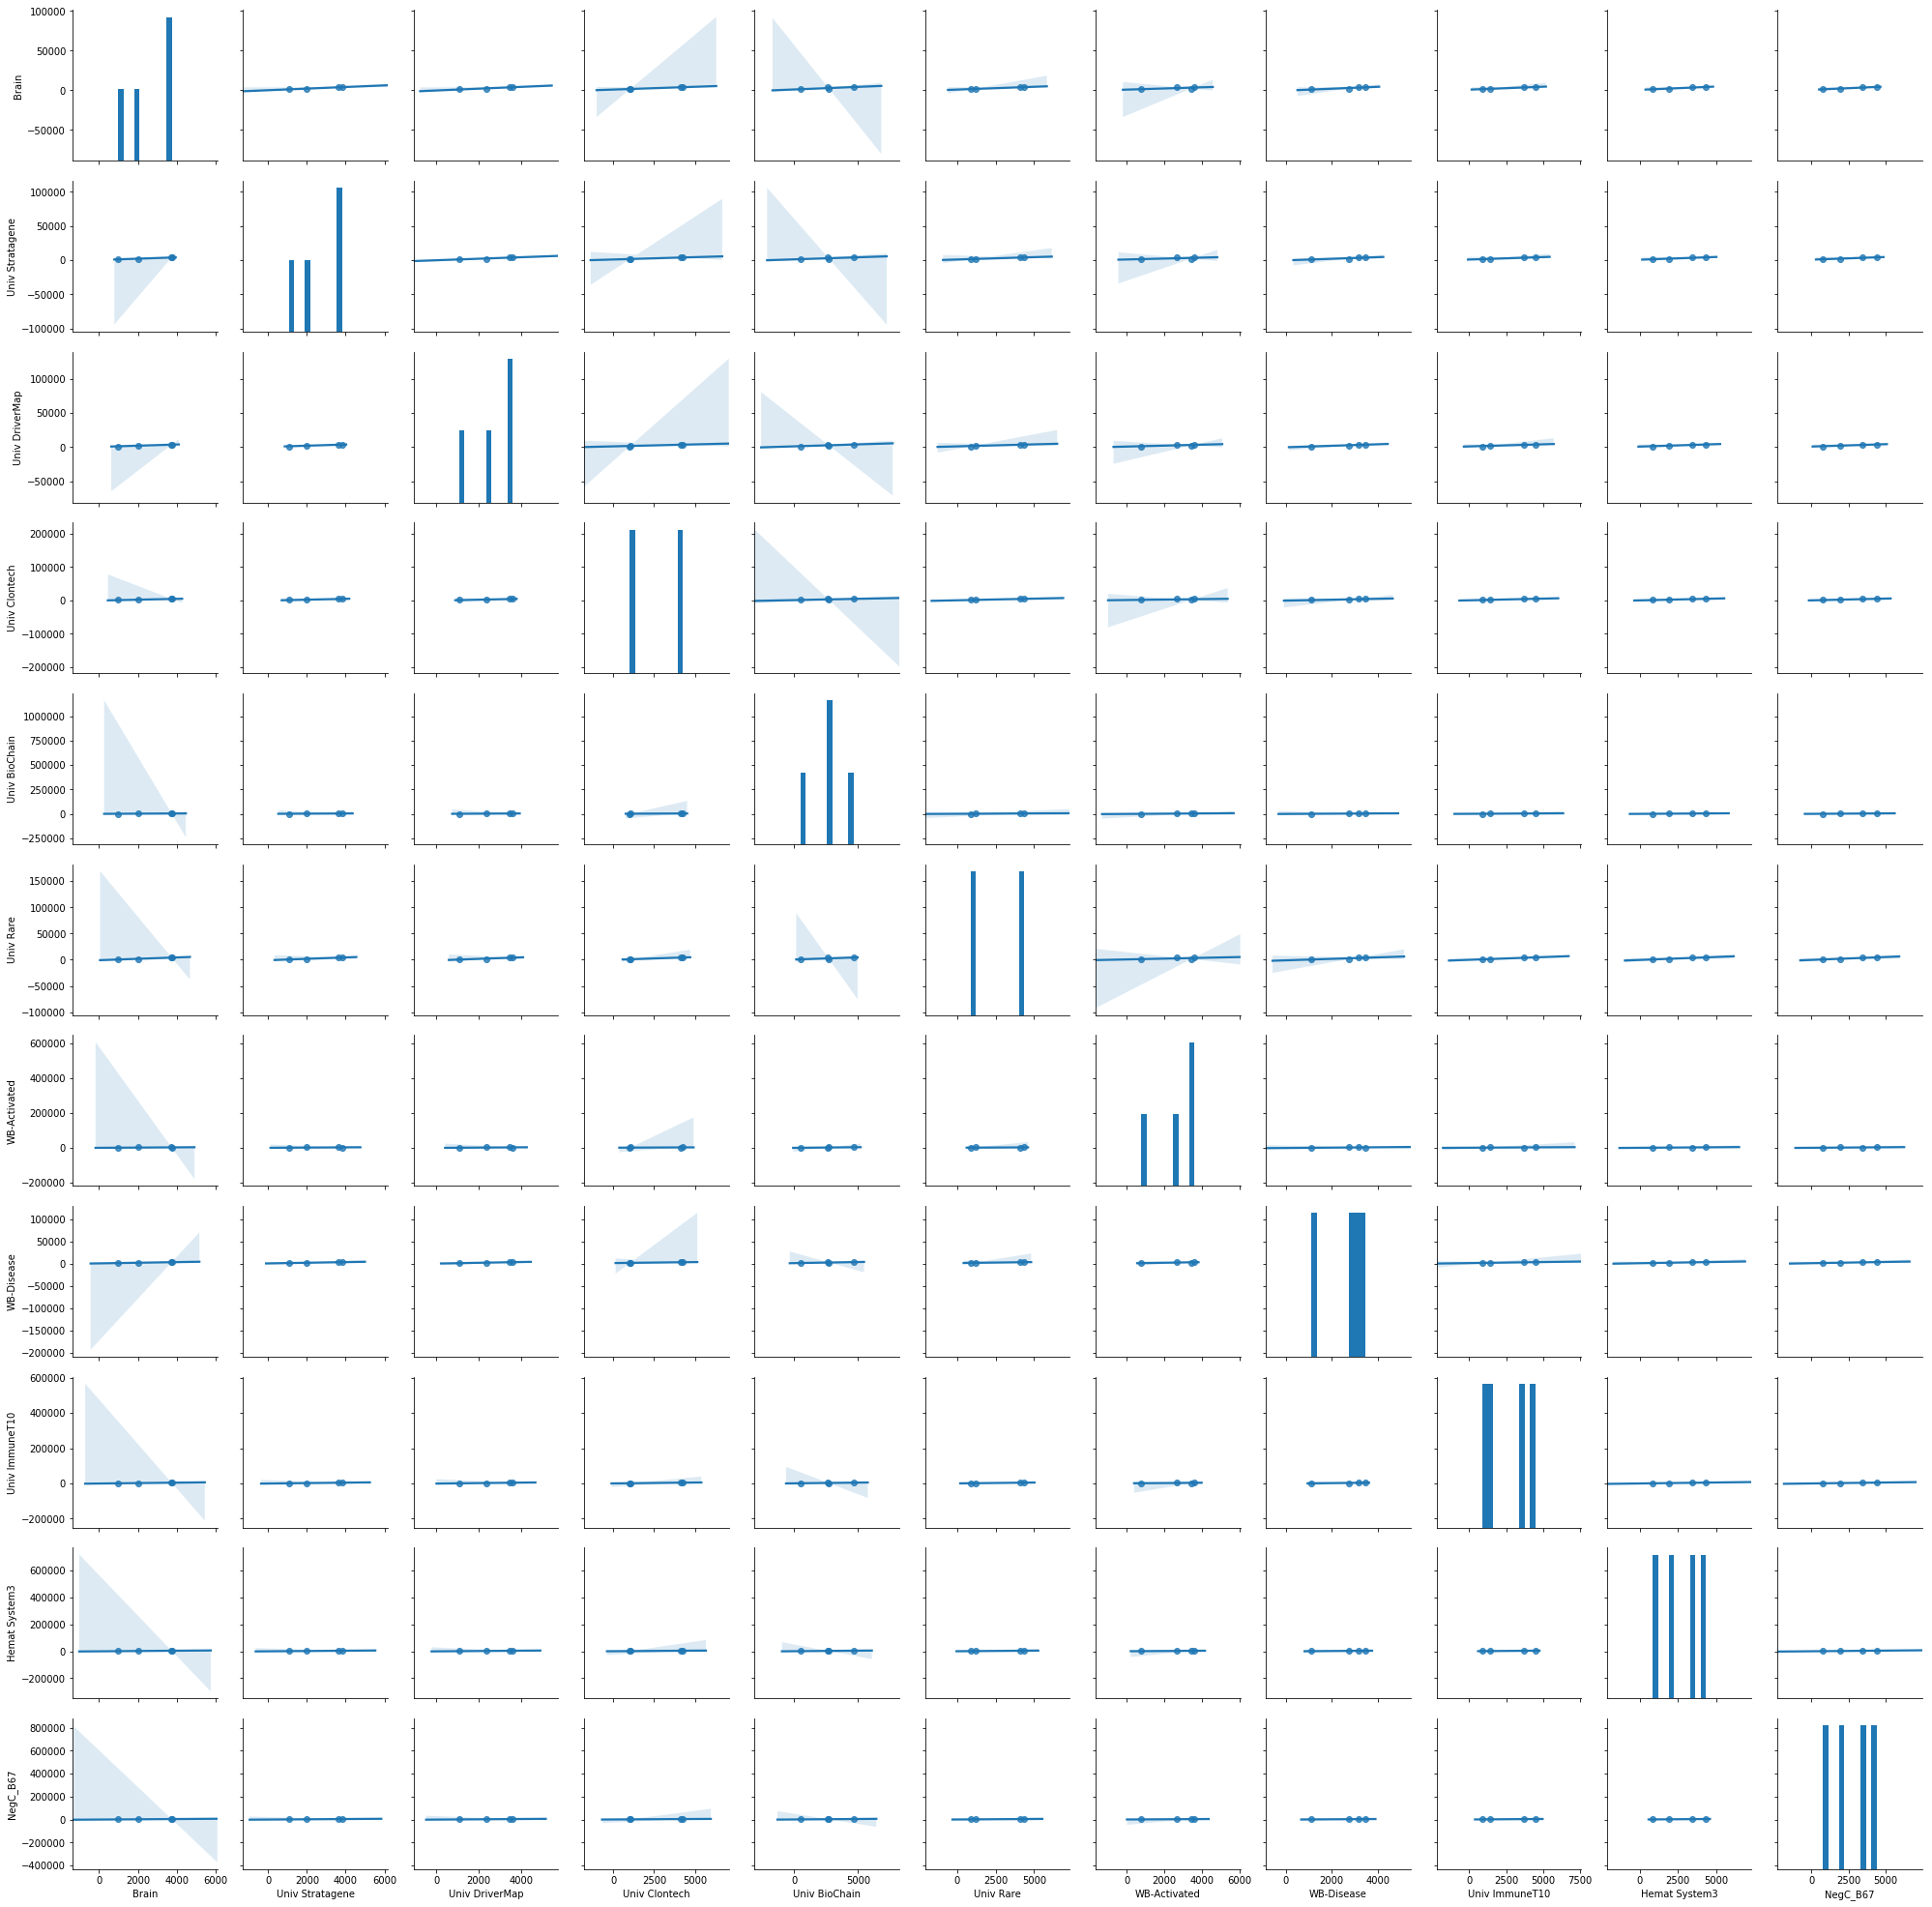

In [48]:
sns.pairplot(binned_bsa_data, kind="reg")
plt.show()

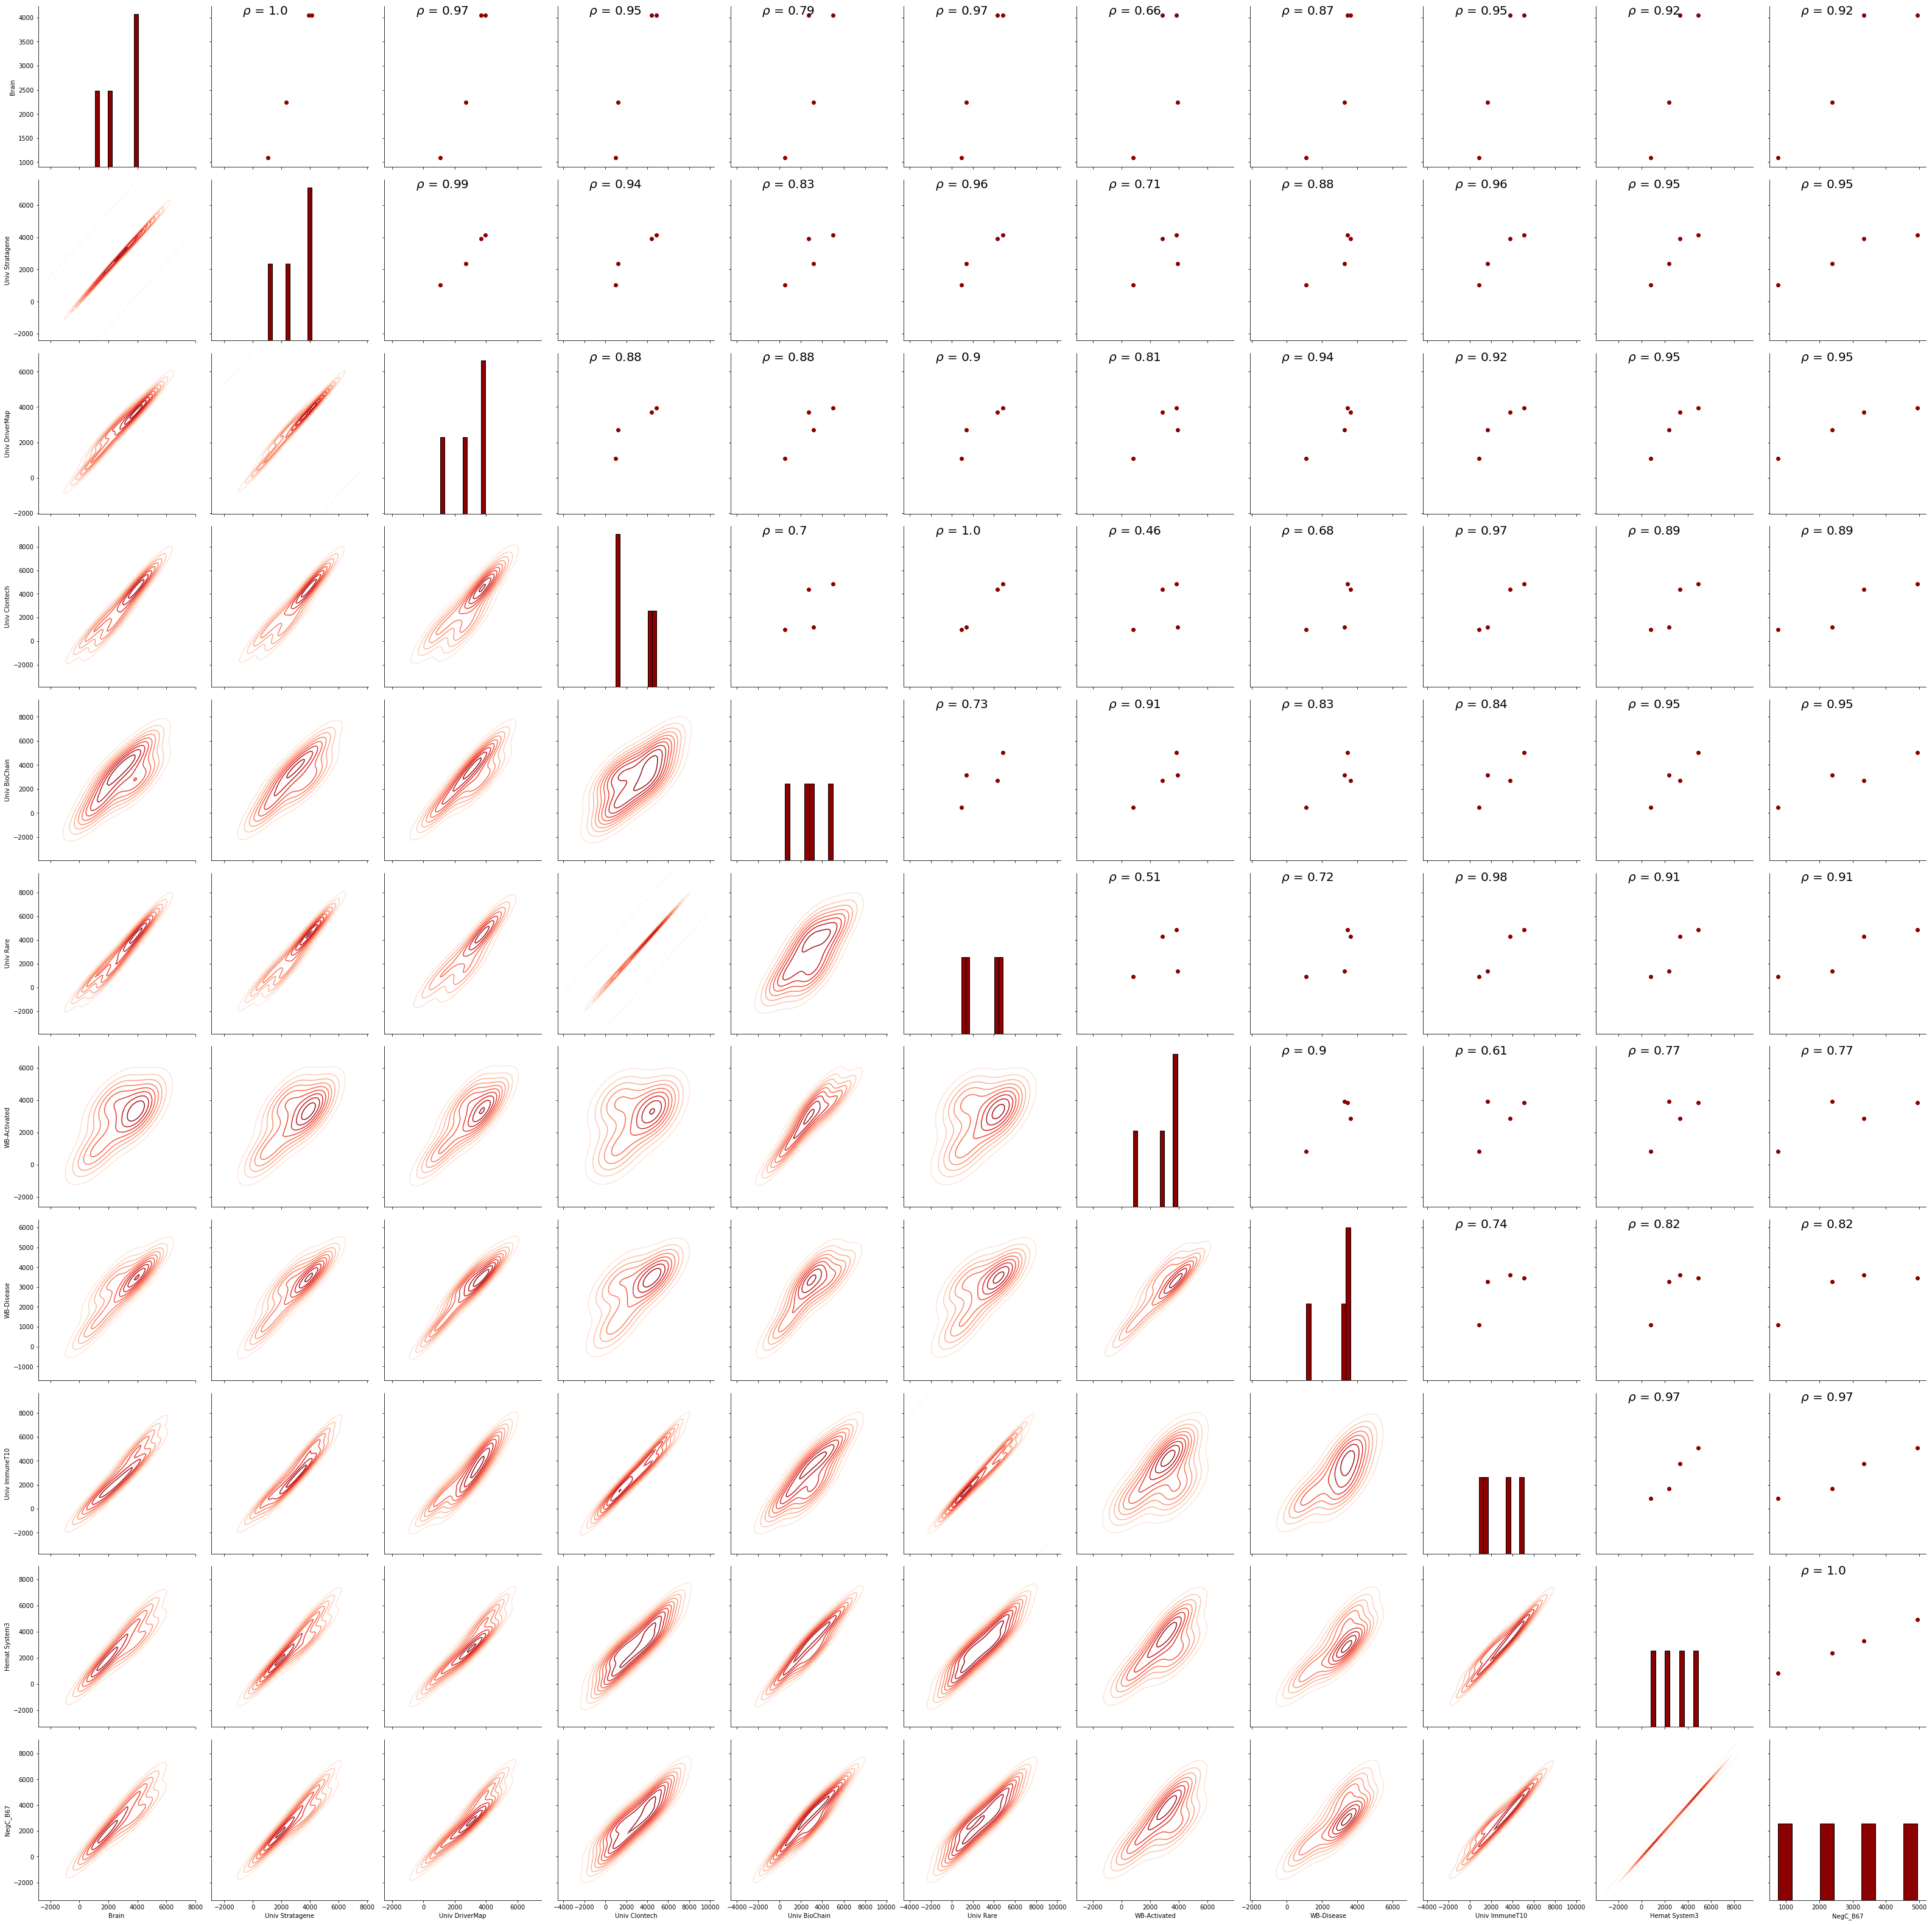

In [50]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# Create a pair grid instance
grid = sns.PairGrid(data= binned_dm_data, size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');